# Playoff Profit: Does profit really outperform in the playoffs?

The goal is to create a stastic that can be used to evaluate player contribution towards a win in the Overwatch League (OWL)

Process:
* Prepare data for analyses through combining and cleaning
* Test different models to determine best model for predicting wins using player stats
* Use best model to create a general statistic that can demonstrate player contribution towards a win
* Compare the stastic between regular season and playoff play

## Importing/Combining Data

### Importing

In [1]:
# Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

### Reading/Combining Data

* The data is split based on stage (for 2018 and 2019) or part of season (for 2020 and 2021) and year
* This test file only uses the 2018 season for predictions
* Simplified maps dataset to 1 entry per map played instead of including each round of every map

In [2]:
s1_2018 = pd.read_csv('original csv files/phs_2018_stage_1.csv')
s2_2018 = pd.read_csv('original csv files/phs_2018_stage_2.csv')
s3_2018 = pd.read_csv('original csv files/phs_2018_stage_3.csv')
s4_2018 = pd.read_csv('original csv files/phs_2018_stage_4.csv')
playoffs_2018 = pd.read_csv('original csv files/phs_2018_playoffs.csv')
s1_2019 = pd.read_csv('original csv files/phs_2019_stage_1.csv')
s2_2019 = pd.read_csv('original csv files/phs_2019_stage_2.csv')
s3_2019 = pd.read_csv('original csv files/phs_2019_stage_3.csv')
s4_2019 = pd.read_csv('original csv files/phs_2019_stage_4.csv')
playoffs_2019 = pd.read_csv('original csv files/phs_2019_playoffs.csv')
p1_2020 = pd.read_csv('original csv files/phs_2020_1.csv')
p2_2020 = pd.read_csv('original csv files/phs_2020_2.csv')
p1_2021 = pd.read_csv('original csv files/phs_2021_p1.csv')
p2_2021 = pd.read_csv('original csv files/phs_2021_p2.csv')

In [3]:
p1_2020 = p1_2020.rename(columns={"esports_match_id": "match_id", "player_name": "player", "team_name": "team", "hero_name":"hero"})
p2_2020 = p2_2020.rename(columns={"esports_match_id": "match_id", "player_name": "player", "team_name": "team", "hero_name":"hero"})
p1_2021 = p1_2021.rename(columns={"esports_match_id": "match_id", "player_name": "player", "team_name": "team", "hero_name":"hero"})
p2_2021 = p2_2021.rename(columns={"esports_match_id": "match_id", "player_name": "player", "team_name": "team", "hero_name":"hero"})

In [4]:
df_list = [s1_2018, s2_2018, s3_2018, s4_2018, playoffs_2018, 
           s1_2019, s2_2019, s3_2019, s4_2019, playoffs_2019,
           p1_2020, p2_2020, p1_2021, p2_2021]
stats = pd.concat(df_list)

In [5]:
maps = pd.read_csv('original csv files/match_map_stats_000000000000.csv')
maps = maps[['match_id', 'map_name', 'match_winner', 'map_winner']]
maps = maps.drop_duplicates()

## Cleaning Data

#### Combining rows

* The dataset contains one row per stat, player, map, and hero
* These rows were combined into one entry per player, map, and hero with all stats in one row

In [6]:
stats = stats.pivot_table(
    index=['match_id', 'map_name', 'map_type', 'team', 'player', 'hero'],
    columns='stat_name',
    values='stat_amount'
).reset_index()

In [7]:
stats

stat_name,match_id,map_name,map_type,team,player,hero,Ability Damage Done,Accretion Kills,Accretion Stuns,Adaptive Shield Uses,Air Uptime,Air Uptime Percentage,All Damage Done,Amped Heal Activations,Amped Speed Activations,Amplification Matrix Assists,Amplification Matrix Casts,Amplification Matrix Efficiency,Armor - Rally,Armor - Repair Pack,Armor Packs Created,Armor Provided,Armor Uptime,Assists,Average Energy,Average Players per Teleporter,Average Time Alive,Barrage Efficiency,Barrage Kills,Barrier Damage Done,Biotic Field Healing Done,Biotic Fields Deployed,Biotic Grenade Kills,Biotic Launcher Healing Explosions,Biotic Launcher Healing Shots,Biotic Orb Damage Efficiency,Biotic Orb Healing Efficiency,Biotic Orb Maximum Damage,Biotic Orb Maximum Healing,Blaster Kills,Blizzard Efficiency,Blizzard Kills,Bob Gun Damage,Bob Kills,Charge Kills,Coach Gun Kills,Coalescence Healing,Coalescence Kills,Coalesence - Damage per Use,Coalesence - Healing per Use,Concussion Mine Kills,Critical Hit Accuracy,Critical Hit Kills,Critical Hits,Damage - Accretion,Damage - Barrage,Damage - Biotic Grenade,Damage - Biotic Orb,Damage - Blizzard,Damage - Bob,Damage - Bob Charge,Damage - Boosters,Damage - Call Mech,Damage - Chain Hook,Damage - Charge,Damage - Coach Gun,Damage - Coalescence,Damage - Concussion Mine,Damage - Deadeye,Damage - Death Blossom,Damage - Deflect,Damage - Discord Orb,Damage - Dragonblade,Damage - Dragonblade Total,Damage - Dragonstrike,Damage - Duplicate,Damage - Dynamite,Damage - EMP,Damage - Earthshatter,Damage - Fire Strike,Damage - Flashbang,Damage - Focusing Beam,Damage - Focusing Beam - Bonus Damage Only,Damage - Grappling Claw,Damage - Graviton Surge,Damage - Helix Rockets,Damage - Hyperspheres,Damage - Jump Pack,Damage - Meteor Strike,Damage - Micro Missiles,Damage - Minefield,Damage - Molten Core,Damage - Piledriver,Damage - Pistol,Damage - Primal Rage Leap,Damage - Primal Rage Melee,Damage - Primal Rage Total,Damage - Pulse Bomb,Damage - Quick Melee,Damage - RIP-Tire,Damage - Rising Uppercut,Damage - Rocket Punch,Damage - Scatter,Damage - Seismic Slam,Damage - Self Destruct,Damage - Sentry Turret,Damage - Shield Bash,Damage - Sonic,Damage - Steel Trap,Damage - Sticky Bombs,Damage - Storm Arrows,Damage - Swift Strike,Damage - Swift Strike Dragonblade,Damage - Tactical Visor,Damage - Total Mayhem,Damage - Turret Rockets,Damage - Venom Mine,Damage - Weapon,Damage - Weapon Charged,Damage - Weapon Hammer,Damage - Weapon Pistol,Damage - Weapon Primary,Damage - Weapon Recon,Damage - Weapon Scoped,Damage - Weapon Secondary,Damage - Weapon Sentry,Damage - Weapon Tank,Damage - Whole Hog,Damage Absorbed,Damage Amplified,Damage Blocked,Damage Done,Damage Prevented,Damage Reflected,Damage Taken,Damage Taken - Adaptive Shield,Damage Taken - Ball,Damage Taken - Tank,Deadeye Efficiency,Deadeye Kills,Death Blossom Efficiency,Death Blossom Kills,Death Blossoms,Deaths,Defensive Assists,Deflection Kills,Direct Hit Accuracy,Discord Orb Time,Dragonblade Efficiency,Dragonblade Kills,Dragonblades,Dragonstrike Efficiency,Dragonstrike Kills,Duplicate Kills,Dynamite Kills,EMP Efficiency,Earthshatter Efficiency,Earthshatter Kills,Earthshatter Stuns,Eliminations,Eliminations per Life,Enemies EMP'd,Enemies Frozen,Enemies Hacked,Enemies Hooked,Enemies Slept,Enemies Trapped,Energy Maximum,Environmental Deaths,Environmental Kills,Fan the Hammer Kills,Final Blows,Fire Strike Kills,Focusing Beam Accuracy,Focusing Beam Dealing Damage Seconds,Focusing Beam Kills,Focusing Beam Seconds,Frag Launcher Direct Hits,Freeze Spray Damage,Grappling Claw Impacts,Grappling Claw Kills,Grappling Claw Uses,Gravitic Flux Damage Done,Gravitic Flux Kills,Graviton Surge Efficiency,Graviton Surge Kills,Hammer Kills,Harmony Orb Time,Heal Song Time Elapsed,Healing - Biotic Grenade,Healing - Biotic Launcher,Healing - Biotic Orb,Healing - Coalescence,Healing - Harmony Orb,Healing - Healing Boost,Healing - Healing Boost Amped,Healing - Immortality Field,Healing - Inspire,Healing 

#### Adding map data

* Combine map data with player stats by match_id and map_name
* Convert match_winner and map_winner to int for easier use (0 = loss, 1 = win)

In [8]:
stats = pd.merge(stats, maps, on=['match_id', 'map_name'])

stats['match_winner'] = np.where(stats.match_winner == stats.team, True, False)
stats['map_winner'] = np.where(stats.map_winner == stats.team, True, False)

#### Removing Hero-Specific Stats
* Drop columns with over 50% NaN values
* Remove "All Heroes" entries

In [9]:
thresh = len(stats) * .5
stats = stats.dropna(thresh = thresh, axis = 1)
stats = stats[stats['hero'] != 'All Heroes']

#### Resulting DataFrame

In [10]:
stats

,match_id,map_name,map_type,team,player,hero,All Damage Done,Assists,Average Time Alive,Barrier Damage Done,Damage - Quick Melee,Damage Taken,Deaths,Eliminations,Final Blows,Hero Damage Done,Objective Kills,Objective Time,Shots Fired,Time Alive,Time Building Ultimate,Time Elapsed per Ultimate Earned,Time Holding Ultimate,Time Played,Ultimates Earned - Fractional,Ultimates Used,Weapon Accuracy,match_winner,map_winner
1,10223,Dorado,PAYLOAD,Los Angeles Valiant,Agilities,Genji,18079.206920,17.0,NaN,2893.659185,443.204010,6366.272322,11.0,32.0,15.0,15053.887730,7.0,29.617000,1060.0,NaN,694.193020,77.728449,94.136003,836.332770,8.931003,8.0,0.273585,True,True
3,10223,Dorado,PAYLOAD,Los Angeles Valiant,Envy,D.Va,16121.693630,24.0,NaN,4970.275000,85.000000,17511.894920,8.0,36.0,12.0,11077.082750,9.0,117.109998,16030.0,NaN,630.194018,63.794644,206.948006,836.332770,9.878478,23.0,0.314785,True,True
5,10223,Dorado,PAYLOAD,Los Angeles Valiant,Fate,Winston,10582.841190,23.0,NaN,1486.675676,504.049756,17838.003230,12.0,33.0,10.0,8909.393466,12.0,77.461999,NaN,NaN,643.772019,103.952997,143.093004,836.332770,6.192914,5.0,NaN,True,True
7,10223,Dorado,PAYLOAD,Los Angeles Valiant,KariV,Mercy,370.000000,2.0,NaN,20.000000,30.000000,2774.318343,7.0,2.0,NaN,350.000000,2.0,80.310999,39.0,NaN,534.979016,94.452052,217.043006,836.332770,5.664027,5.0,0.333333,True,True
9,10223,Dorado,PAYLOAD,Los Angeles Valiant,SoOn,Tracer,14648.537490,16.0,NaN,3361.396517,134.000000,3933.404831,7.0,28.0,12.0,11253.140970,9.0,69.579999,5628.0,NaN,682.852020,65.118940,65.665002,750.675685,10.486228,9.0,0.376155,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160024,37448,Temple of Anubis,ASSAULT,Washington Justice,Decay,Symmetra,6864.803006,7.0,46.047287,3451.100126,30.000000,3102.515014,6.0,7.0,NaN,2618.048665,4.0,39.004001,69.0,322.331010,334.614010,142.435825,37.083001,384.469511,2.349226,1.0,0.290323,False,False
160026,37448,Temple of Anubis,ASSAULT,Washington Justice,Fury,D.Va,7746.123944,1.0,68.853669,2845.148690,145.000000,8204.564258,5.0,4.0,3.0,3611.486519,2.0,48.265001,6325.0,413.122012,430.022013,74.731912,18.144001,449.693143,5.754195,4.0,0.383997,False,False
160027,37448,Temple of Anubis,ASSAULT,Washington Justice,Fury,Wrecking Ball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.931000,0.938000,NaN,NaN,0.975964,NaN,NaN,NaN,False,False
160029,37448,Temple of Anubis,ASSAULT,Washington Justice,MAG,Reinhardt,5338.624115,NaN,46.085501,1535.000000,NaN,8541.615416,8.0,1.0,1.0,3598.064110,NaN,26.299001,NaN,368.684011,426.356012,126.145679,4.123000,438.019392,3.379870,3.0,NaN,False,False


#### Saving cleaned data

In [11]:
stats.to_csv("OWL_stats.csv", index=False)

## Preparing Data
* Requires choosing either map wins or match wins to predict

#### X/Y split
* Can choose between predicting match or map wins by changing value in train/test split, default is map
* Focus only on the stats, ignore names, teams, and maps

In [12]:
y_match = stats['match_winner'] # Predicts match wins
y_map = stats['map_winner'] # Predicts map wins

X = stats.drop(['player', 'team', 'map_name', 'hero', 'map_type'], axis=1)
X = X.drop(['match_winner', 'map_winner', 'match_id'], axis=1)

#### Preprocessing
* Fill NaN values with 0, as most represent stat not being registered (no healing/no damage)

In [13]:
from sklearn.model_selection import train_test_split

X = X.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y_map, test_size=0.25, random_state=42)

## Modeling Data

### Random Forest

* Slightly more false negatives than false positives, but hard to determine why

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(n_jobs=-1, n_estimators=300)
rf_clf.fit(X_train, y_train)

print('Train accuracy score:', accuracy_score(y_train, rf_clf.predict(X_train)))
print('Test accuracy score:', accuracy_score(y_test, rf_clf.predict(X_test)))

Train accuracy score: 0.9994333564188126
Test accuracy score: 0.7197416137805984


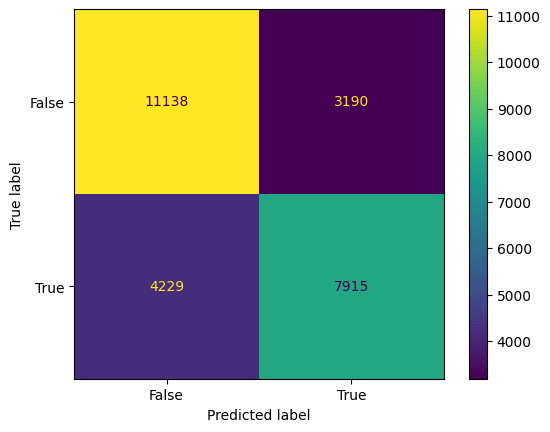

In [15]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)

disp.plot()
plt.show()

## Improving Model

### Using Correlation

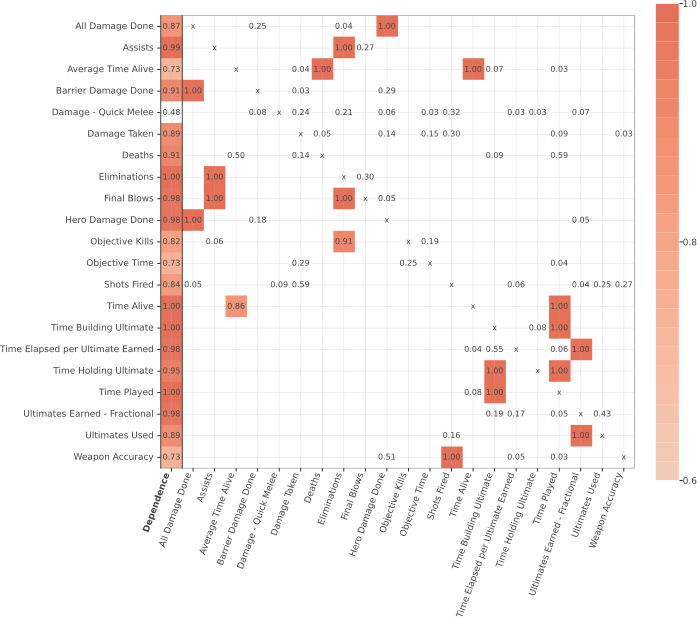

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import rfpimp

dependence_matrix = rfpimp.feature_dependence_matrix(X_train,
                          rfrmodel=RandomForestRegressor(n_estimators=50, oob_score=True, n_jobs=-1),
                          rfcmodel=RandomForestClassifier(n_estimators=50, oob_score=True, n_jobs=-1),
                          cat_count=20,
                          zero=0.001,
                          sort_by_dependence=False,
                          n_samples=5000)

plt.rcParams["figure.figsize"] = (10,10)
rfpimp.plot_dependence_heatmap(dependence_matrix)

Looking at the heatmap produced above, there appears to be high correlation between:
* All Damage Done, Barrier Damage Done, and Hero Damage Done
* Assists, Eliminations, Objective Kills, and Final Blows
* Shots Fired and Weapon Accuracy
* Time Building Ultimate, Time Played, Time Holding Ultimate, and Deaths
* Ultimates Earned - Fractional, Time Elapsed per Ultimate Earned, and Damage Taken

### Feature Importance
Using the conclusions drawn from the correlation heat map, highly correlated features were combined then used to produce a feature importance graph. Objective Time and Ultimates Used did not have high correlation with any other features.

Another feature importance graph was generated to show each feature seperately.

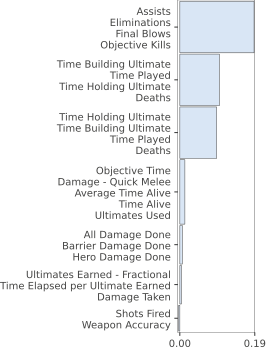

In [17]:
combined_features = [['All Damage Done', 'Barrier Damage Done', 'Hero Damage Done'],
                    ['Assists', 'Eliminations', 'Final Blows', 'Objective Kills'], 
                    ['Shots Fired', 'Weapon Accuracy'],
                    ['Time Building Ultimate', 'Time Played', 'Time Holding Ultimate', 'Deaths'],
                    ['Time Holding Ultimate', 'Time Building Ultimate', 'Time Played', 'Deaths'], 
                    ['Ultimates Earned - Fractional', 'Time Elapsed per Ultimate Earned', 'Damage Taken']]

cmb_imp = rfpimp.importances(rf_clf, X_test, y_test, features=combined_features)
rfpimp.plot_importances(cmb_imp)

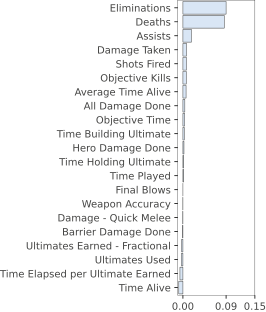

In [18]:
sep_imp = rfpimp.importances(rf_clf, X_test, y_test, features=X.columns)
rfpimp.plot_importances(sep_imp)

### Removing Collinear Features

#### Assists, Eliminations, Objective Kills, and Final Blows

All of are part of eliminating an opponent, but certain roles may be more likely to get assists than eliminations. However, objective kills and final blows can be more random elements as they are based on location of the elimination and getting in the last bit of damage. As a result, final blows and objective kills will be dropped.

#### Time Building Ultimate, Time Played, Time Holding Ultimate, and Deaths

Time played can be derived from time building and holding ultimate, while deaths appears to be the most important feature on its own. However, time played can be used to regularize stats over a given time period (i.e. per 10 minutes), so it will not be dropped.

#### All Damage Done, Barrier Damage Done, and Hero Damage Done

Barrier damage done and hero damage done can both be used to calculate all damage done. As a result, all damage done will be dropped.

#### Shots Fired and Weapon Accuracy

Both of these have high variance depending on the hero being played, making them have little impact in this model that does not factor in the hero being played.

#### Ultimates Earned - Fractional, Time Elapsed per Ultimate Earned, and Damage Taken

Ultimates earned and time elapsed per ultimate earned are very similar, whearas damage taken has no direct impact on ultimates earned (although it can have an impact on ultimates earned for teammates). Ultimates earned will be dropped as it has slightly less importance on its own.

### Rebuilding the Model

The model is retrained with the aforementioned columns dropped.

In [19]:
new_X = X.drop(['Final Blows', 'Objective Kills', 'Time Played', 'All Damage Done',
            'Ultimates Earned - Fractional'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(new_X, y_map, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

new_rf_clf = RandomForestClassifier(n_jobs=-1, n_estimators=300)
new_rf_clf.fit(X_train, y_train)

print('Train accuracy score:', accuracy_score(y_train, new_rf_clf.predict(X_train)))
print('Test accuracy score:', accuracy_score(y_test, new_rf_clf.predict(X_test)))

Train accuracy score: 0.9965647097710987
Test accuracy score: 0.7173009727075267


                                  Importance
Feature                                     
Eliminations                          0.1496
Deaths                                0.1038
Assists                               0.0206
Objective Time                        0.0120
Shots Fired                           0.0090
Time Building Ultimate                0.0088
Barrier Damage Done                   0.0072
Hero Damage Done                      0.0064
Time Holding Ultimate                 0.0064
Damage Taken                          0.0042
Average Time Alive                    0.0036
Weapon Accuracy                       0.0006
Time Alive                           -0.0002
Time Elapsed per Ultimate Earned     -0.0012
Ultimates Used                       -0.0014
Damage - Quick Melee                 -0.0016


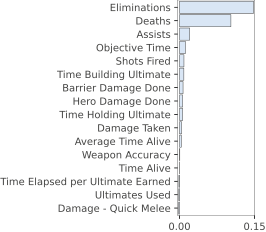

In [21]:
sep_imp = rfpimp.importances(new_rf_clf, X_test, y_test, features=new_X.columns)
print(sep_imp)
rfpimp.plot_importances(sep_imp)

### Results

There appears to be little to no gain in accuracy when comparing the original model to the new model after removing collinear features. This is a positive though, as it means less features can be used to build our statistic without having to worry about a loss in predictive accuracy.